In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_games = pd.read_csv('board_games.csv')

Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   


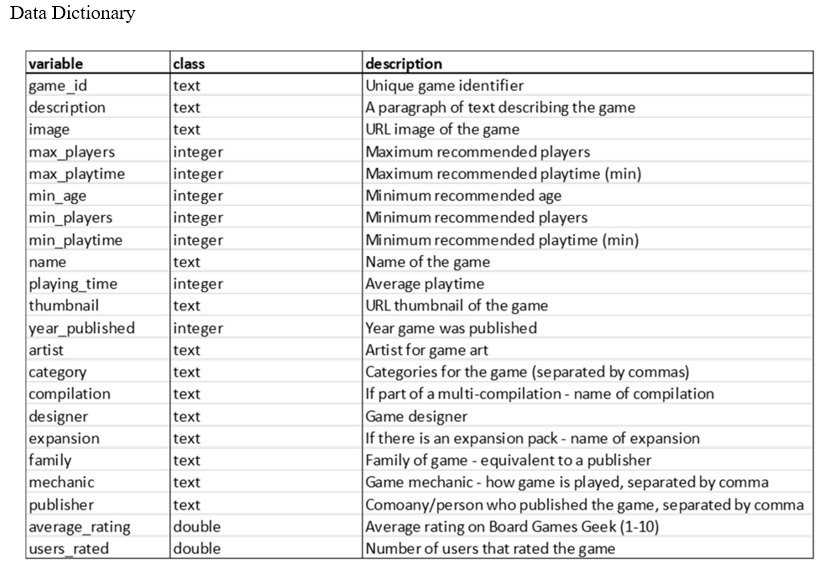

In [3]:
# Data Dictionary
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

In [4]:
df_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [5]:
df_games.shape

(10532, 22)

In [6]:
df_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [7]:
df_games.describe(include=object)

,description,image,name,thumbnail,artist,category,compilation,designer,expansion,family,mechanic,publisher
count,10532,10531,10532,10531,7759,10438,410,10406,2752,7724,9582,10529
unique,10528,10527,10357,10527,4641,3860,336,4678,2634,3918,3209,5512
top,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,Robin Hood,//cf.geekdo-images.com/images/pic2410035_t.png,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games
freq,3,2,5,2,166,449,8,558,7,391,523,180


In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [9]:
num_nulls = df_games.isna().sum()
print(num_nulls)

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64


## Part 1: (Column Names are denoted by quotation marks)
  
•	What are the top 5 “average rated” games?

•	Is there a correlation between the “users_rated” and the “max_playtime”?

•	What is the distribution of game categories? (You may not use a barchart)

•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

•	What are the 5 most common “mechanics” in the dataset?

### What are the top 5 “average rated” games?

Data Table with the top 5 games with “average rating” are:
                                                 name  average_rating
8348                     Small World Designer Edition         9.00392
6392                           Kingdom Death: Monster         8.93184
9964                           Terra Mystica: Big Box         8.84862
8526                          Last Chance for Victory         8.84603
9675  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081


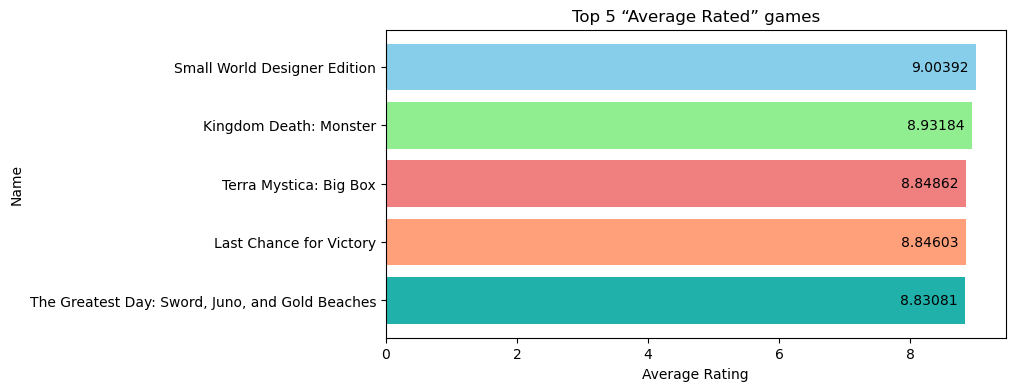

In [10]:
# Top 5 “average rated” games
df_games_top_5 = df_games[['name', 'average_rating']]

df_games_top_5 = df_games_top_5.sort_values(by='average_rating', ascending=False)

top_5 = df_games_top_5.head(5)

print("Data Table with the top 5 games with “average rating” are:")
print(top_5)

# Visualization
plt.figure(figsize=(8, 4))  
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'] 

bars = plt.barh(top_5['name'], top_5['average_rating'], color=colors)  

for bar, rating in zip(bars, top_5['average_rating']):
    plt.text(bar.get_width() - 0.99, bar.get_y() + bar.get_height() / 2, f'{rating}', va='center')

plt.xlabel('Average Rating')
plt.ylabel('Name')
plt.title('Top 5 “Average Rated” games')
plt.gca().invert_yaxis()
plt.show()

### Is there a correlation between the “users_rated” and the “max_playtime”?

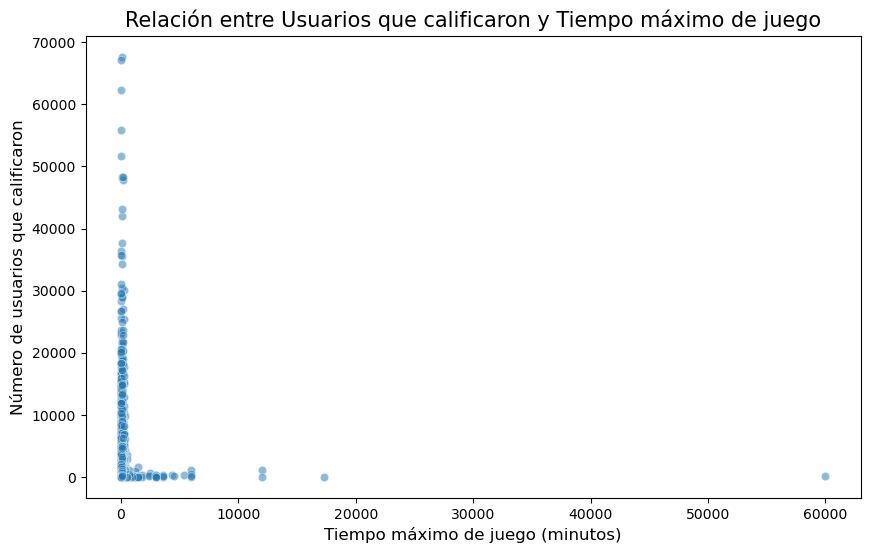

-0.00434164733377671

In [11]:
# Calculamos el coeficiente de correlación de Pearson entre 'users_rated' y 'max_playtime'
correlation = df_games['users_rated'].corr(df_games['max_playtime'])

# Visualizamos la correlación con un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_games['max_playtime'], y=df_games['users_rated'], alpha=0.5)
plt.title('Relación entre Usuarios que calificaron y Tiempo máximo de juego', fontsize=15)
plt.xlabel('Tiempo máximo de juego (minutos)', fontsize=12)
plt.ylabel('Número de usuarios que calificaron', fontsize=12)
plt.show()

correlation

### What is the distribution of game categories? (You may not use a barchart)

#### Basic Text Feature Extraction ("category") column

In [12]:
print(df_games["category"].head(20))

0                        Economic,Negotiation,Political
1                                     Card Game,Fantasy
2                            Abstract Strategy,Medieval
3                                               Ancient
4                                              Economic
5                                 Civilization,Nautical
6                                     Abstract Strategy
7                                  Civilization,Fantasy
8                                           Exploration
9                                        Fantasy,Travel
10                        Card Game,Farming,Negotiation
11                                    Ancient,Mythology
12                                          Negotiation
13                                          Negotiation
14                 Bluffing,Negotiation,Science Fiction
15                                             Economic
16    Collectible Components,Dice,Fighting,Print & Play
17                    Miniatures,Racing,Science 

In [13]:
# Verificar la cantidad de valores nulos en la columna "category"
null_count_category = df_games["category"].isnull().sum()

null_count_category

94

Para asegurarte de que todos los valores en la columna "category" sean de tipo string, puedes convertir explícitamente todos los valores de esa columna a string utilizando el método astype(str) de pandas.

Eso sí, ten en cuenta que si conviertes valores nulos (NaN) a string, se convertirán en la cadena de caracteres "nan". Si no deseas este comportamiento, primero deberías manejar los valores nulos de alguna forma (por ejemplo, eliminándolos o llenándolos con algún valor por defecto)

En este caso vamos a reemplazar los nulos por "Unknown" ya que si los eliminamos se eliminaria la fila completa y para nuestro analisis pueden haber otros datos de importancia para nuestro analisis.

El error que estás obteniendo se debe a que hay valores nulos o de tipo "float" en la columna "category" y, por lo tanto, no se puede aplicar la función split() a esos valores.

In [14]:
df_games["category"].fillna("Unknown", inplace=True)

In [15]:
# Number of Words
df_games['word_count'] = df_games["category"].apply(lambda x: len(str(x).split(" "))) 
df_games[["category",'word_count']].head()

,category,word_count
0,"Economic,Negotiation,Political",1
1,"Card Game,Fantasy",2
2,"Abstract Strategy,Medieval",2
3,Ancient,1
4,Economic,1


In [16]:
# Number of characters
df_games['char_count'] = df_games['category'].str.len() 
df_games[['category','char_count']].head()

,category,char_count
0,"Economic,Negotiation,Political",30
1,"Card Game,Fantasy",17
2,"Abstract Strategy,Medieval",26
3,Ancient,7
4,Economic,8


In [17]:
# Average Word Length
def avg_word(sentence): 
    words = sentence.split() 
    return (sum(len(word) for word in words)/len(words)) if words else 0 

df_games['avg_word'] = df_games['category'].apply(lambda x: avg_word(x)) 
df_games[['category','avg_word']].head()

,category,avg_word
0,"Economic,Negotiation,Political",30.0
1,"Card Game,Fantasy",8.0
2,"Abstract Strategy,Medieval",12.5
3,Ancient,7.0
4,Economic,8.0


In [18]:
# Number of stopwords
import nltk 

from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['stopwords'] = df_games['category'].apply(lambda x: len([x for x in x.split() if x in stop])) 
df_games[['category','stopwords']].head()

,category,stopwords
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


In [19]:
# Number of numerics

df_games['numerics'] = df_games['category'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) 
df_games[['category','numerics']].head() 

,category,numerics
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


In [20]:
# Number of Uppercase words

df_games['upper'] = df_games['category'].apply(lambda x: len([x for x in x.split() if x.isupper()])) 
df_games[['category','upper']].head() 

,category,upper
0,"Economic,Negotiation,Political",0
1,"Card Game,Fantasy",0
2,"Abstract Strategy,Medieval",0
3,Ancient,0
4,Economic,0


#### Basic Text Pre-processing ("category") column

In [21]:
# Tokenization
categories_tokenized = df_games["category"].str.split(',')
categories_tokenized.head()

0    [Economic, Negotiation, Political]
1                  [Card Game, Fantasy]
2         [Abstract Strategy, Medieval]
3                             [Ancient]
4                            [Economic]
Name: category, dtype: object

In [22]:
# Convert to lowercase and Remove extra spaces
categories_tokenized = categories_tokenized.apply(lambda x: [item.strip().lower() for item in x])
categories_tokenized.head()

0    [economic, negotiation, political]
1                  [card game, fantasy]
2         [abstract strategy, medieval]
3                             [ancient]
4                            [economic]
Name: category, dtype: object

In [23]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# Instanciar el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicar la lematización a la columna tokenizada
categories_tokenized = categories_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#### Advance Text Processing ("category") column

La columna "category" contiene etiquetas de categorías para cada juego, y estas etiquetas son palabras clave que describen el tipo o género del juego. Dado que estas etiquetas son discretas y no requieren una comprensión profunda del contexto, no es necesario utilizar modelos complejos como BERT o LSTM.

Para la columna "category", las siguientes técnicas de vectorización serían las más adecuadas:

Bag of Words (BoW):

Es útil si algunas entradas tienen múltiples categorías (por ejemplo, "Estrategia,Aventura").
Cada palabra o etiqueta se cuenta y se representa como un vector.

One-Hot Encoding:

Es simple y efectivo para categorías discretas.
Cada categoría se representa como un vector binario.
Es útil cuando las categorías no tienen un orden inherente.

TF-IDF:

Similar a BoW, pero da más peso a las categorías que son raras y menos peso a las categorías que aparecen con frecuencia en todo el dataset.
Puede ser útil si ciertas categorías son muy comunes y otras son raras, y quieres dar más importancia a las raras.

n-grams:

Puede ser útil si hay categorías compuestas por más de una palabra y el orden de las palabras es importante (por ejemplo, "juego de cartas" vs. "juego de mesa").

Dado que las categorías suelen ser términos discretos y no frases largas, el uso de n-grams podría no ser tan relevante en este caso.

Para tu dataset y específicamente para la columna "category", One-Hot Encoding o BoW serían las opciones más adecuadas, ya que proporcionan una representación simple y eficaz de las categorías. Si decides dar más importancia a las categorías menos comunes, entonces TF-IDF podría ser una buena elección. Sin embargo, dado que cada juego puede pertenecer a múltiples categorías, el enfoque de BoW sería el más intuitivo para comenzar.

##### Bag of Words (BoW)

Primero, necesitas convertir la columna tokenizada de nuevo a texto. Esto se debe a que CountVectorizer espera datos en formato de cadena.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the tokenized column back to string format
categories_string = categories_tokenized.apply(' '.join)

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'mechanic' column
X = vectorizer.fit_transform(categories_string)

# Convert the sparse matrix to a dataframe for visualization
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df_bow.head()

,abstract,action,adult,adventure,age,agents,american,ancient,and,animal,...,video,vietnam,war,warfare,wargame,wars,west,word,world,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Sumar las columnas del dataframe
categories_counts = df_bow.sum(axis=0)

# Ordenar los resultados de mayor a menor
sorted_categories_counts = categories_counts.sort_values(ascending=False).head(20)

# Mostrar los resultados
print(sorted_categories_counts)

game        4924
card        2981
wargame     2034
fantasy     1218
war         1052
fighting     900
economic     878
fiction      850
science      850
dice         838
party        833
world        793
abstract     710
strategy     710
children     704
ii           676
bluffing     655
theme        630
humor        580
building     574
dtype: int64


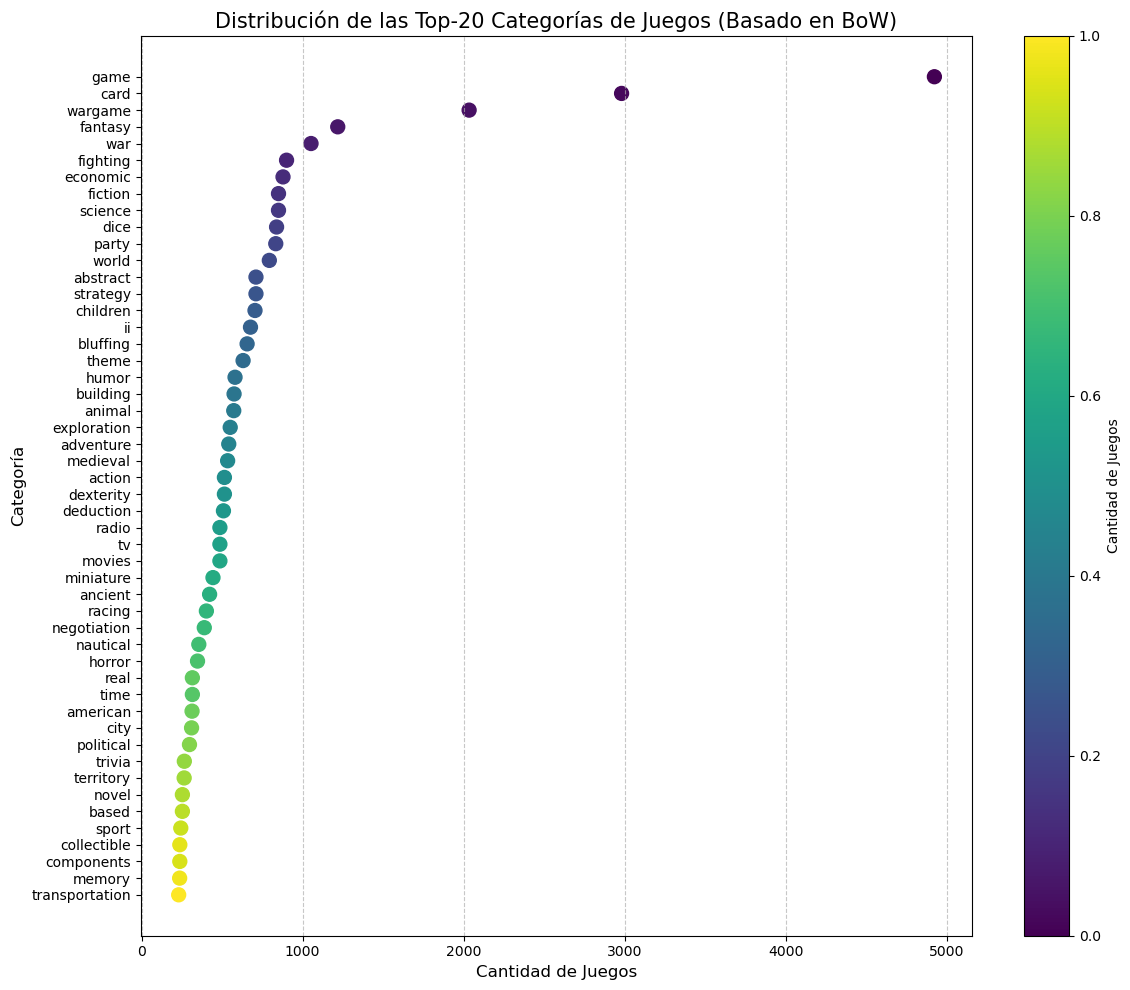

In [26]:
import numpy as np

# Sumar las columnas para obtener la cantidad total de juegos en cada categoría
category_counts = df_bow.sum().sort_values(ascending=False)

# Graficamos las 20 categorías principales
top_20_categories = category_counts.head(50)
counts = top_20_categories.values
categories = top_20_categories.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices = counts.argsort()
sorted_counts = counts[sorted_indices]
sorted_categories = categories[sorted_indices]
sorted_colors = colors[sorted_indices]

# Crear el Dot Plot con colores, usando el análisis previamente realizado
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
sorted_indices = counts.argsort()
sorted_counts = counts[sorted_indices]
sorted_categories = categories[sorted_indices]
sorted_colors = colors[sorted_indices]

plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts, sorted_categories, color=sorted_colors, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos (Basado en BoW)', fontsize=15)
plt.xlabel('Cantidad de Juegos', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.colorbar(label='Cantidad de Juegos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### One-Hot Encoding

In [27]:
# Convert the tokenized column back to string format
categories_string = categories_tokenized.apply(', '.join)

# Apply One-Hot Encoding
categories_onehot = categories_string.str.get_dummies(sep=', ')

categories_onehot.head()

,abstract strategy,action / dexterity,adventure,age of reason,american civil war,american indian wars,american revolutionary war,american west,ancient,animal,...,travel,trivia,unknown,video game theme,vietnam war,wargame,word game,world war i,world war ii,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Sumar las columnas para obtener la cantidad total de juegos en cada categoría
categories_top_20_onehot = categories_onehot.sum().sort_values(ascending=False)

categories_top_20_onehot.head(20)

card game                    2981
wargame                      2034
fantasy                      1218
fighting                      900
economic                      878
science fiction               850
dice                          838
party game                    833
abstract strategy             710
children's game               704
world war ii                  676
bluffing                      655
humor                         580
animal                        572
adventure                     541
medieval                      534
action / dexterity            514
deduction                     508
movies / tv / radio theme     486
miniature                     443
dtype: int64

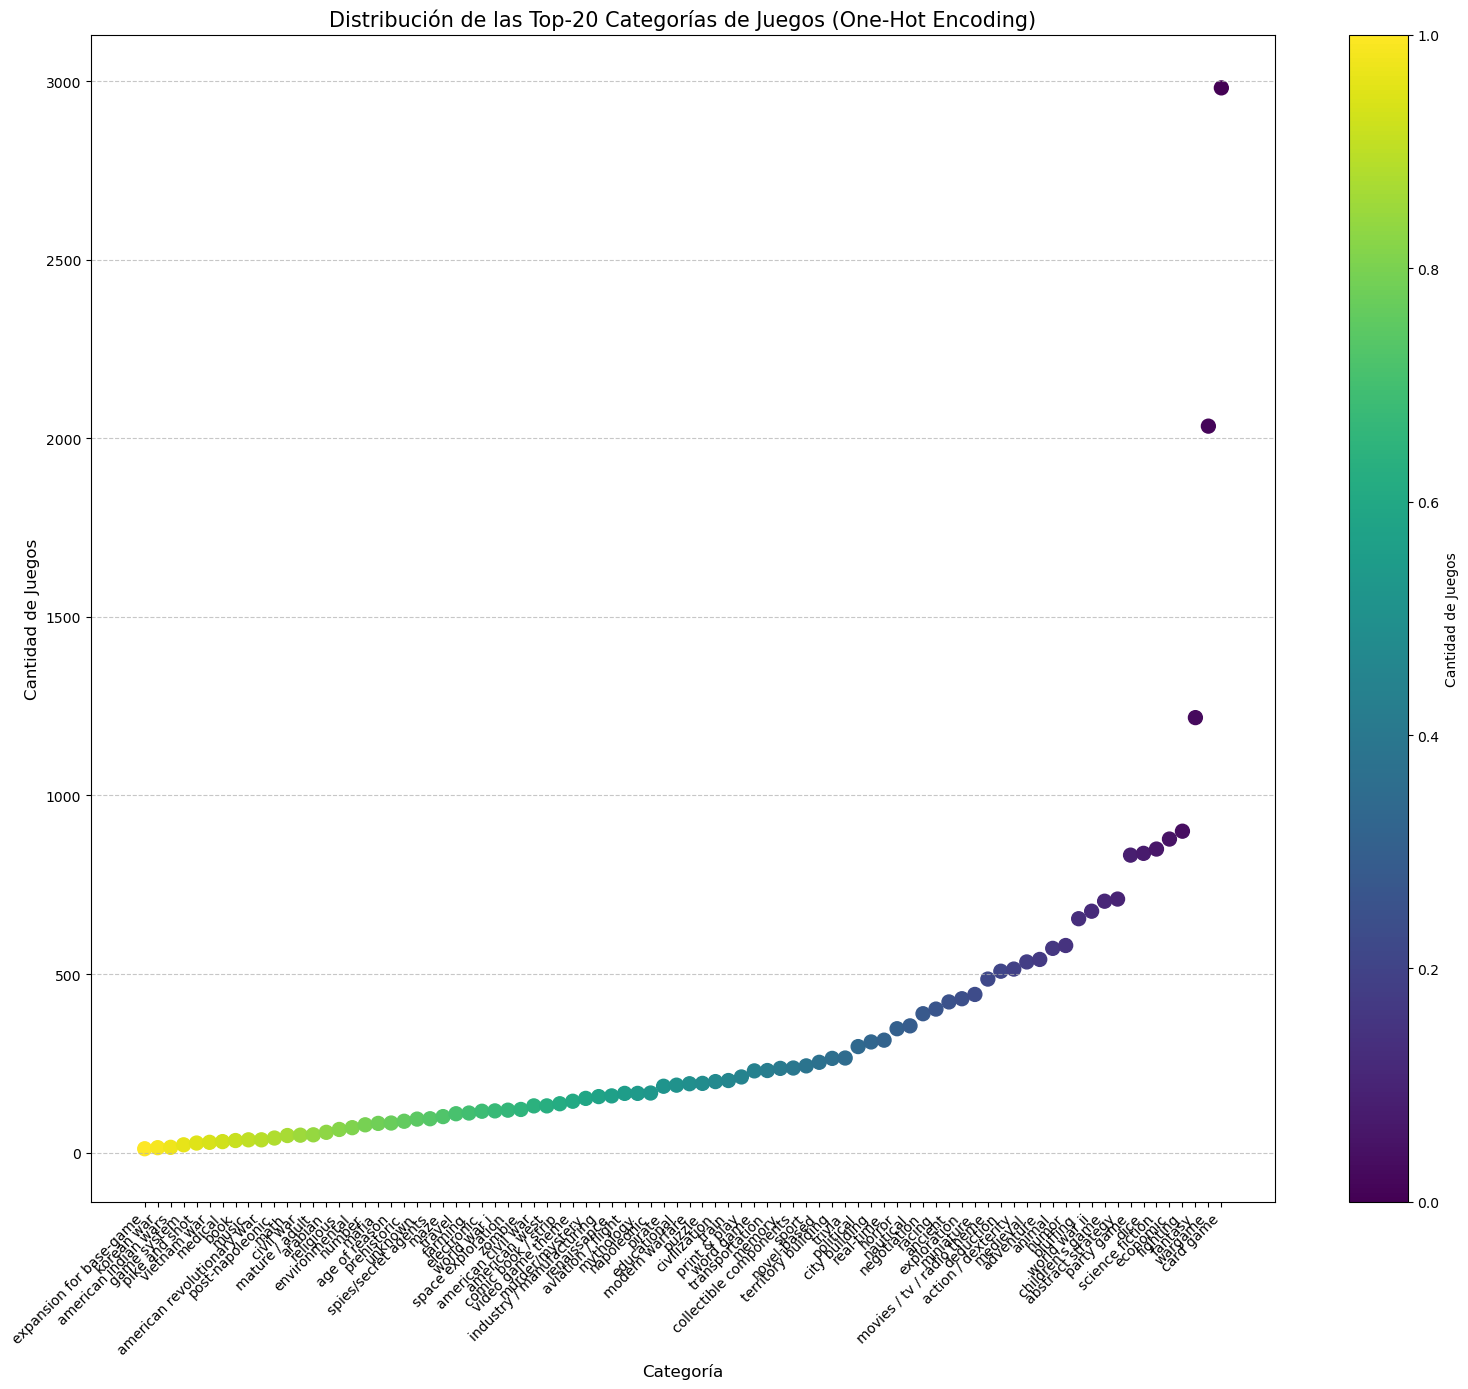

In [29]:
# Tomamos las top-20 categorías y sus respectivas cantidades para One-Hot Encoding
top_20_categories_onehot = categories_top_20_onehot.head(50)
counts_onehot = categories_top_20_onehot.values
categories_onehot = categories_top_20_onehot.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors_onehot = plt.cm.viridis(np.linspace(0, 1, len(counts_onehot)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices_onehot = counts_onehot.argsort()
sorted_counts_onehot = counts_onehot[sorted_indices_onehot]
sorted_categories_onehot = categories_onehot[sorted_indices_onehot]
sorted_colors_onehot = colors_onehot[sorted_indices_onehot]

# Aumentar el tamaño del gráfico
plt.figure(figsize=(16, 14))

# Crear el Dot Plot con colores rotado
plt.scatter(sorted_categories_onehot, sorted_counts_onehot, color=sorted_colors_onehot, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos (One-Hot Encoding)', fontsize=15)
plt.ylabel('Cantidad de Juegos', fontsize=12)
plt.xlabel('Categoría', fontsize=12)
plt.colorbar(label='Cantidad de Juegos')

# Ajustar el espaciado entre las etiquetas del eje x y rotarlas para mejorar la visualización
plt.xticks(fontsize=10, rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the tokenized column back to string format
categories_string = categories_tokenized.apply(' '.join)

# Instantiate the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'mechanic' column with TF-IDF Vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(categories_string)

# Convert the sparse matrix to a dataframe for visualization
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_tfidf.head()

,abstract,action,adult,adventure,age,agents,american,ancient,and,animal,...,video,vietnam,war,warfare,wargame,wars,west,word,world,zombie
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.562558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Sumar las columnas para obtener la importancia total de cada categoría
tfidf_distribution = df_tfidf.sum().sort_values(ascending=False)
tfidf_distribution.head(20)

game        1443.363456
card        1145.916725
wargame      771.840590
fantasy      583.620557
economic     465.169826
war          453.014438
dice         450.487515
strategy     401.798279
abstract     401.798279
party        392.097379
world        391.624001
fighting     385.150439
fiction      362.214180
science      362.214180
ii           344.984679
children     332.935154
bluffing     327.804738
medieval     325.591588
animal       320.223381
humor        290.617306
dtype: float64

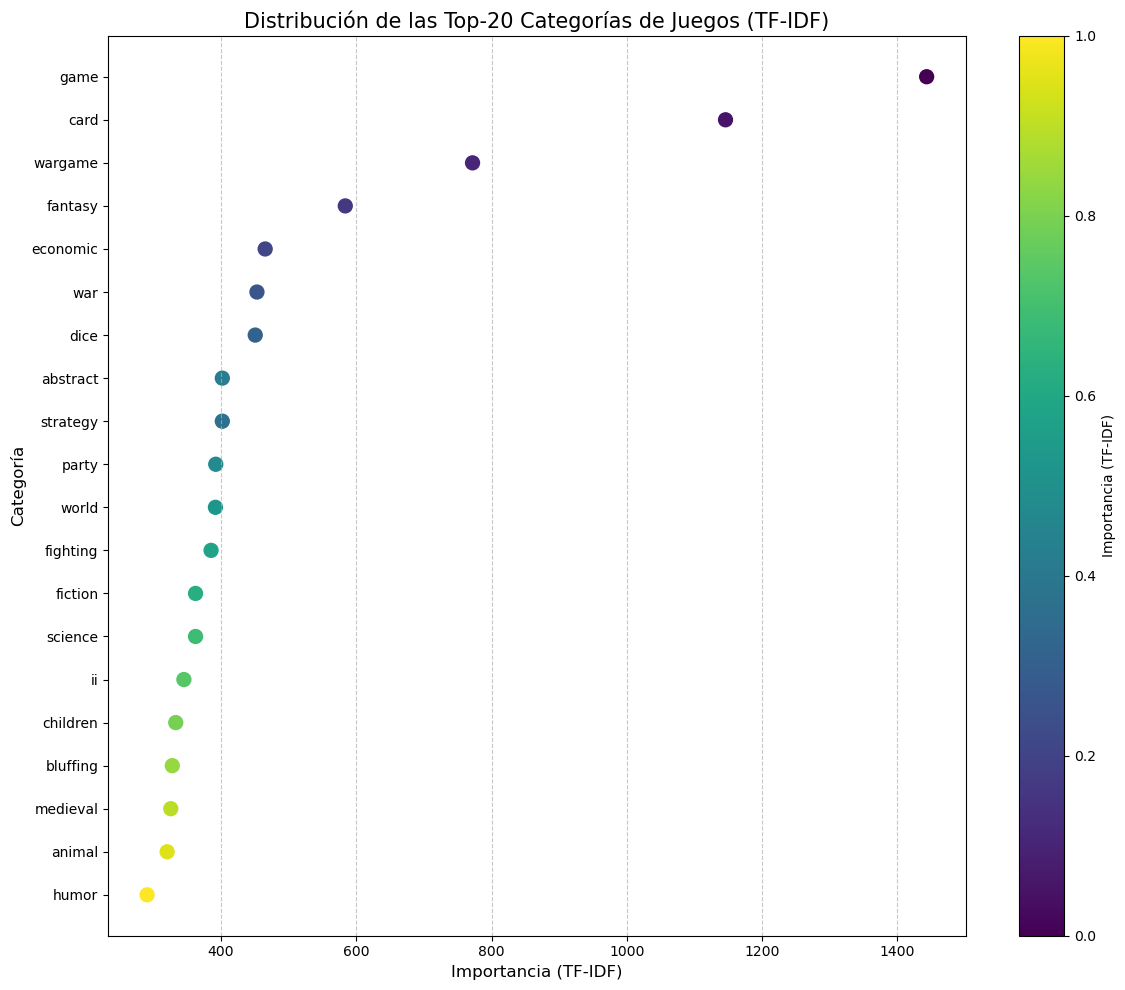

In [32]:
# Tomamos las top-20 categorías y sus respectivas importancias
top_20_categories_tfidf = tfidf_distribution.head(20)
counts_tfidf = top_20_categories_tfidf.values
categories_tfidf = top_20_categories_tfidf.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors_tfidf = plt.cm.viridis(np.linspace(0, 1, len(counts_tfidf)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices_tfidf = counts_tfidf.argsort()
sorted_counts_tfidf = counts_tfidf[sorted_indices_tfidf]
sorted_categories_tfidf = categories_tfidf[sorted_indices_tfidf]
sorted_colors_tfidf = colors_tfidf[sorted_indices_tfidf]

# Crear el Dot Plot con colores
plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts_tfidf, sorted_categories_tfidf, color=sorted_colors_tfidf, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos (TF-IDF)', fontsize=15)
plt.xlabel('Importancia (TF-IDF)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.colorbar(label='Importancia (TF-IDF)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### n-grams

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the tokenized column back to string format
categories_string = categories_tokenized.apply(' '.join)

# Instantiate a CountVectorizer with n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(4, 4))  # Using both unigrams and bigrams

# Fit and transform the 'mechanic' column
X_ngrams = ngram_vectorizer.fit_transform(categories_string)

# Convert the sparse matrix to a dataframe for visualization
df_ngrams = pd.DataFrame(X_ngrams.toarray(), columns=ngram_vectorizer.get_feature_names_out())

df_ngrams.head()

,abstract strategy action dexterity,abstract strategy adventure dice,abstract strategy adventure economic,abstract strategy american west,abstract strategy ancient arabian,abstract strategy ancient city,abstract strategy ancient civilization,abstract strategy ancient dice,abstract strategy ancient game,abstract strategy ancient mythology,...,west economic negotiation transportation,west economic territory building,west economic train transportation,west exploration fighting horror,west fantasy fighting horror,west farming humor political,west fighting horror miniature,west fighting miniature wargame,west post napoleonic wargame,world war world war
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Sumar las columnas para obtener la cantidad total de juegos en cada n-gram
ngram_counts = df_ngrams.sum().sort_values(ascending=False)

ngram_counts.head(50)

wargame world war ii                      634
movies tv radio theme                     486
card game collectible components          144
card game children game                   140
action dexterity children game            128
radio theme science fiction               127
tv radio theme science                    127
science fiction space exploration         103
american civil war wargame                 97
card game party game                       85
bluffing card game deduction               81
card game fantasy fighting                 75
card game city building                    69
nautical wargame world war                 63
party game word game                       63
party game real time                       59
game comic book strip                      56
action dexterity card game                 55
abstract strategy card game                54
game movies tv radio                       54
dexterity animal children game             50
miniature science fiction wargame 

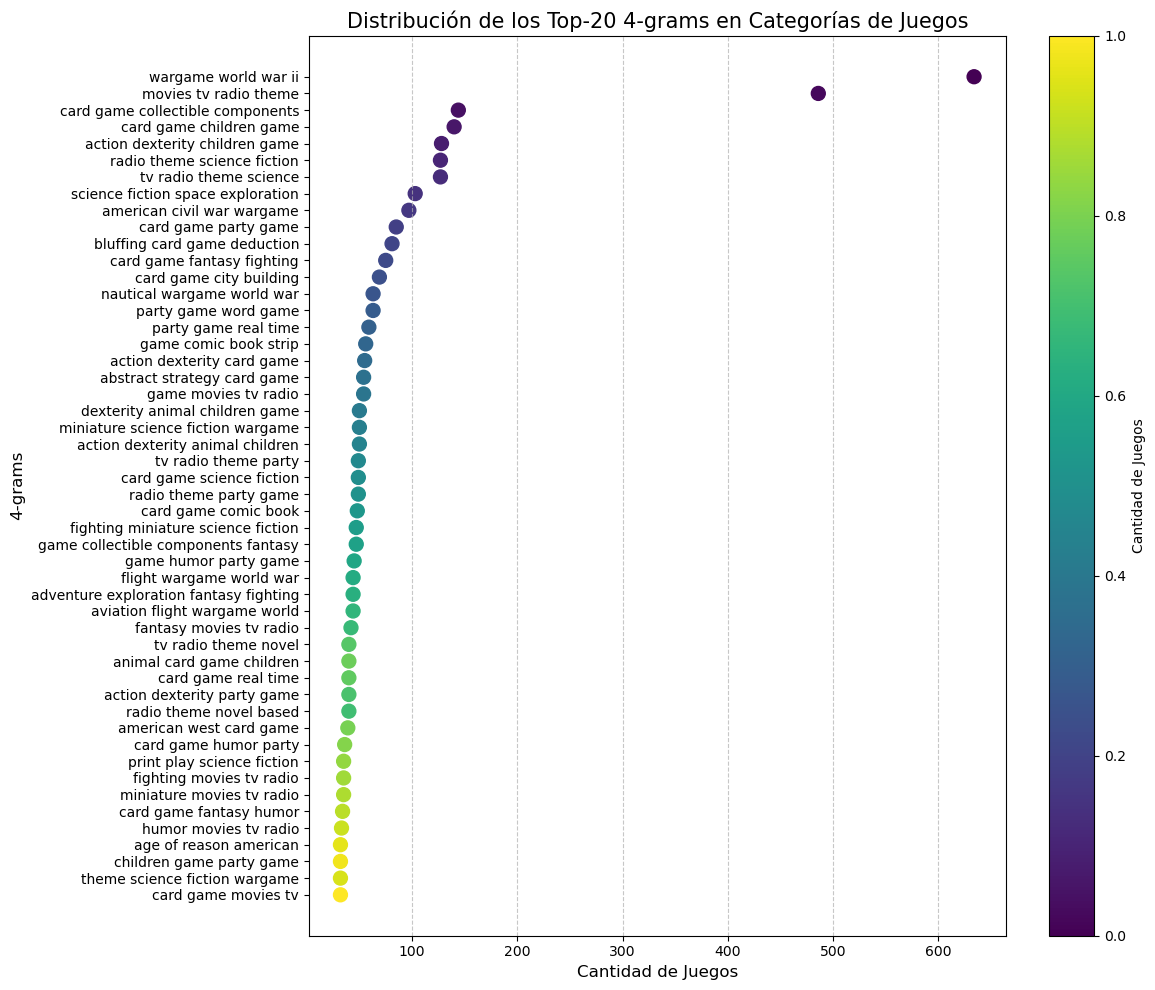

In [35]:
# Tomamos las top-20 n-grams (4-grams en este caso) y sus respectivas cantidades
top_20_ngrams = ngram_counts.head(50)
counts_ngrams = top_20_ngrams.values
ngrams = top_20_ngrams.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors_ngrams = plt.cm.viridis(np.linspace(0, 1, len(counts_ngrams)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices_ngrams = counts_ngrams.argsort()
sorted_counts_ngrams = counts_ngrams[sorted_indices_ngrams]
sorted_ngrams = ngrams[sorted_indices_ngrams]
sorted_colors_ngrams = colors_ngrams[sorted_indices_ngrams]

# Crear el Dot Plot con colores para los 4-grams
plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts_ngrams, sorted_ngrams, color=sorted_colors_ngrams, s=100)
plt.title('Distribución de los Top-20 4-grams en Categorías de Juegos', fontsize=15)
plt.xlabel('Cantidad de Juegos', fontsize=12)
plt.ylabel('4-grams', fontsize=12)
plt.colorbar(label='Cantidad de Juegos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

In [36]:
# Dividimos el dataframe en dos grupos: juegos antiguos (1992 y anteriores) y juegos nuevos (después de 1992)
older_games = df_games[df_games['year_published'] <= 1992]
newer_games = df_games[df_games['year_published'] > 1992]

# Calculamos la mediana de la calificación promedio para cada grupo
median_rating_older = older_games['average_rating'].median()
median_rating_newer = newer_games['average_rating'].median()

median_rating_older, median_rating_newer

(6.08812, 6.462915)

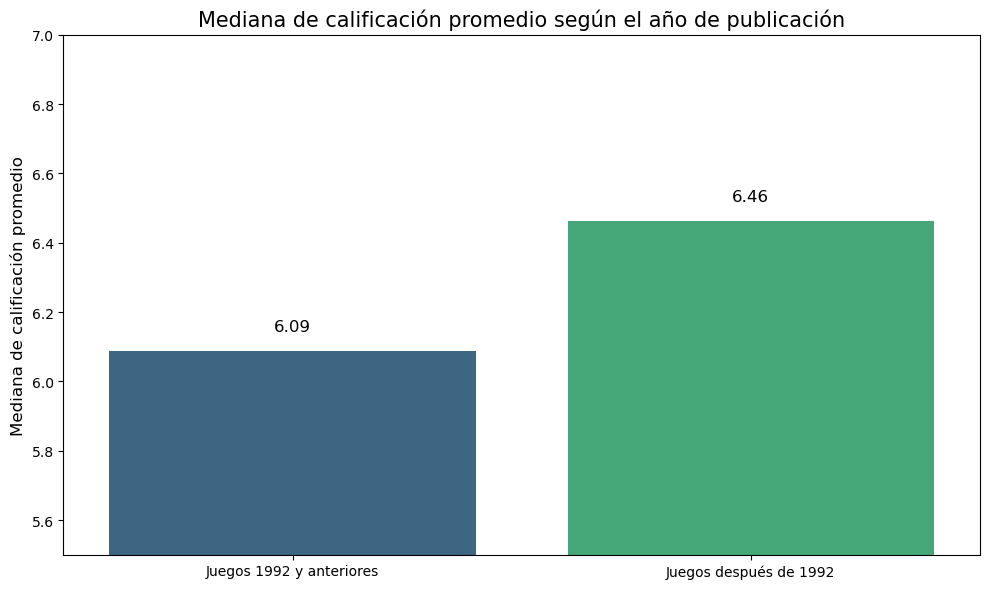

In [37]:
# Visualización de las medianas de calificación promedio para juegos antiguos y nuevos
labels = ['Juegos 1992 y anteriores', 'Juegos después de 1992']
medians = [median_rating_older, median_rating_newer]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=medians, palette='viridis')
plt.title('Mediana de calificación promedio según el año de publicación', fontsize=15)
plt.ylabel('Mediana de calificación promedio', fontsize=12)
plt.ylim(5.5, 7)

# Mostrar las medianas exactas en las barras
for i, v in enumerate(medians):
    plt.text(i, v + 0.05, "{:.2f}".format(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### What are the 5 most common “mechanics” in the dataset?

#### Basic Text Feature Extraction ("mechanic") column

In [38]:
print(df_games["mechanic"].head(20))

0     Area Control / Area Influence,Auction/Bidding,...
1                                          Trick-taking
2     Area Control / Area Influence,Hand Management,...
3     Action Point Allowance System,Area Control / A...
4          Hand Management,Stock Holding,Tile Placement
5                                          Dice Rolling
6     Area Enclosure,Pattern Building,Pattern Recogn...
7                                         Modular Board
8          Area Control / Area Influence,Tile Placement
9     Card Drafting,Hand Management,Point to Point M...
10               Hand Management,Set Collection,Trading
11       Auction/Bidding,Press Your Luck,Set Collection
12    Dice Rolling,Hand Management,Modular Board,Rou...
13    Roll / Spin and Move,Set Collection,Simultaneo...
14               Hand Management,Variable Player Powers
15                                      Auction/Bidding
16                         Dice Rolling,Press Your Luck
17    Action / Movement Programming,Grid Movemen

In [39]:
# Verificar la cantidad de valores nulos en la columna "category"
null_count_mechanic = df_games["mechanic"].isnull().sum()

null_count_mechanic

950

In [40]:
df_games["mechanic"].fillna("Unknown", inplace=True)

In [41]:
# Number of Words
df_games['word_count'] = df_games["mechanic"].apply(lambda x: len(str(x).split(" "))) 
df_games[["mechanic",'word_count']].head()

,mechanic,word_count
0,"Area Control / Area Influence,Auction/Bidding,...",9
1,Trick-taking,1
2,"Area Control / Area Influence,Hand Management,...",8
3,"Action Point Allowance System,Area Control / A...",9
4,"Hand Management,Stock Holding,Tile Placement",4


In [42]:
# Number of characters
df_games['char_count'] = df_games['mechanic'].str.len() 
df_games[['mechanic','char_count']].head()

,mechanic,char_count
0,"Area Control / Area Influence,Auction/Bidding,...",104
1,Trick-taking,12
2,"Area Control / Area Influence,Hand Management,...",75
3,"Action Point Allowance System,Area Control / A...",90
4,"Hand Management,Stock Holding,Tile Placement",44


In [43]:
# Average Word Length
def avg_word(sentence): 
    words = sentence.split() 
    return (sum(len(word) for word in words)/len(words)) if words else 0 

df_games['avg_word'] = df_games['mechanic'].apply(lambda x: avg_word(x)) 
df_games[['mechanic','avg_word']].head()

,mechanic,avg_word
0,"Area Control / Area Influence,Auction/Bidding,...",10.666667
1,Trick-taking,12.000000
2,"Area Control / Area Influence,Hand Management,...",8.500000
3,"Action Point Allowance System,Area Control / A...",9.111111
4,"Hand Management,Stock Holding,Tile Placement",10.250000


In [44]:
# Number of stopwords
import nltk 

from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['stopwords'] = df_games['mechanic'].apply(lambda x: len([x for x in x.split() if x in stop])) 
df_games[['mechanic','stopwords']].head()

,mechanic,stopwords
0,"Area Control / Area Influence,Auction/Bidding,...",0
1,Trick-taking,0
2,"Area Control / Area Influence,Hand Management,...",0
3,"Action Point Allowance System,Area Control / A...",0
4,"Hand Management,Stock Holding,Tile Placement",0


In [45]:
# Number of numerics

df_games['numerics'] = df_games['mechanic'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) 
df_games[['mechanic','numerics']].head() 

,mechanic,numerics
0,"Area Control / Area Influence,Auction/Bidding,...",0
1,Trick-taking,0
2,"Area Control / Area Influence,Hand Management,...",0
3,"Action Point Allowance System,Area Control / A...",0
4,"Hand Management,Stock Holding,Tile Placement",0


In [46]:
# Number of Uppercase words

df_games['upper'] = df_games['mechanic'].apply(lambda x: len([x for x in x.split() if x.isupper()])) 
df_games[['mechanic','upper']].head() 

,mechanic,upper
0,"Area Control / Area Influence,Auction/Bidding,...",0
1,Trick-taking,0
2,"Area Control / Area Influence,Hand Management,...",0
3,"Action Point Allowance System,Area Control / A...",0
4,"Hand Management,Stock Holding,Tile Placement",0


#### Basic Text Pre-processing ("mechanic") column

Tokenización: Estás dividiendo la columna "mechanic" en listas de mecánicas usando comas como delimitador. Esto es correcto, ya que las mecánicas están separadas por comas en tu dataset.


Conversión a minúsculas y eliminacion de espacios adicionales: Estás convirtiendo cada mecánica a minúsculas y eliminando espacios adicionales al principio y al final. Este paso es esencial para garantizar la uniformidad en el análisis posterior.


Eliminación de stopwords: Estás utilizando la lista de palabras vacías de nltk para eliminar palabras comunes que podrían no ser relevantes para tu análisis. Si bien las stopwords son típicamente palabras comunes en lenguaje natural (como "and", "the", "is", etc.), en este contexto específico de mecánicas de juegos de mesa, es poco probable que las stopwords sean un problema. Por lo tanto, podrías considerar si este paso es realmente necesario.


Lematización: Estás utilizando el WordNetLemmatizer de nltk para lematizar las mecánicas. Este paso convertirá palabras a su forma base, lo cual es útil, aunque debes tener en cuenta que la lematización depende del contexto y podría no ser siempre perfecta. Sin embargo, es un buen paso para reducir la dimensionalidad de tus datos.

In [47]:
# Tokenization
mechanic_tokenized = df_games["mechanic"].str.split(',')
mechanic_tokenized.head()

0    [Area Control / Area Influence, Auction/Biddin...
1                                       [Trick-taking]
2    [Area Control / Area Influence, Hand Managemen...
3    [Action Point Allowance System, Area Control /...
4     [Hand Management, Stock Holding, Tile Placement]
Name: mechanic, dtype: object

In [48]:
# Convert to lowercase and Remove extra spaces
mechanic_tokenized = mechanic_tokenized.apply(lambda x: [item.strip().lower() for item in x])
mechanic_tokenized.head()

0    [area control / area influence, auction/biddin...
1                                       [trick-taking]
2    [area control / area influence, hand managemen...
3    [action point allowance system, area control /...
4     [hand management, stock holding, tile placement]
Name: mechanic, dtype: object

In [49]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# Instanciar el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicar la lematización a la columna tokenizada
mechanic_tokenized = mechanic_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#### Advance Text Processing ("mechanic") column

##### Bag of Words (BoW)

Primero, necesitas convertir la columna tokenizada de nuevo a texto. Esto se debe a que CountVectorizer espera datos en formato de cadena.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the tokenized column back to string format
mechanic_string = mechanic_tokenized.apply(' '.join)

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'mechanic' column
X = vectorizer.fit_transform(mechanic_string)

# Convert the sparse matrix to a dataframe for visualization
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df_bow.head()

,acting,action,allowance,and,area,auction,battle,betting,bidding,board,...,trading,trick,unit,unknown,up,variable,voting,wagering,worker,your
0,0,1,0,0,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Sumar las columnas del dataframe
mechanic_counts = df_bow.sum(axis=0)

# Ordenar los resultados de mayor a menor
sorted_mechanic_counts = mechanic_counts.sort_values(ascending=False).head(5)

# Mostrar los resultados
print(sorted_mechanic_counts)

rolling       2438
dice          2438
and           2387
area          2364
management    2176
dtype: int64


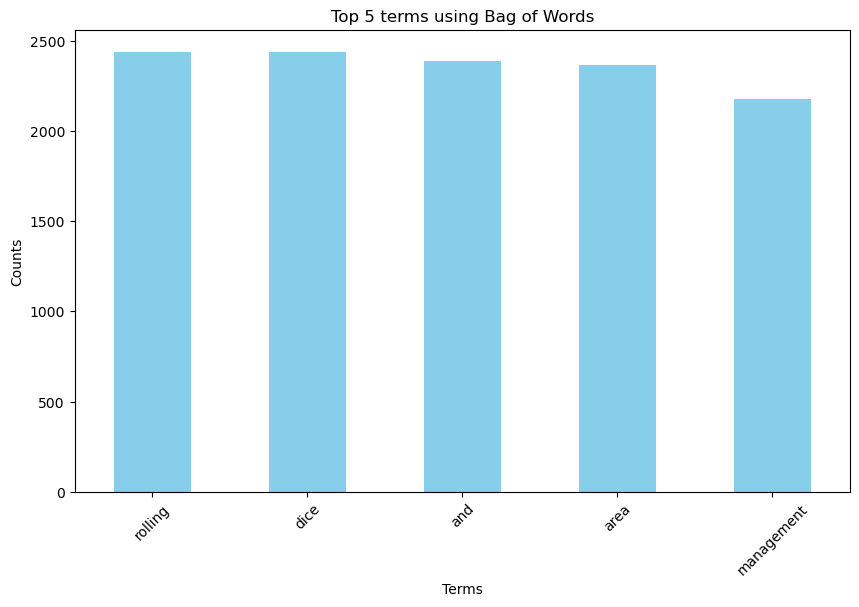

In [52]:
# Plotting the top 5 for BoW
plt.figure(figsize=(10,6))
sorted_mechanic_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 terms using Bag of Words')
plt.ylabel('Counts')
plt.xlabel('Terms')
plt.xticks(rotation=45)
plt.show()

##### One-Hot Encoding

In [53]:
# Convert the tokenized column back to string format
mechanic_string = mechanic_tokenized.apply(', '.join)

# Apply One-Hot Encoding
mechanic_onehot = mechanic_string.str.get_dummies(sep=', ')

mechanic_onehot.head()

,acting,action / movement programming,action point allowance system,area control / area influence,area enclosure,area movement,area-impulse,auction/bidding,betting/wagering,campaign / battle card driven,...,take that,tile placement,time track,trading,trick-taking,unknown,variable phase order,variable player powers,voting,worker placement
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
# Sumar las columnas para obtener la cantidad total de juegos en cada categoría
mechanic_top_5_onehot = mechanic_onehot.sum().sort_values(ascending=False)

mechanic_top_5_onehot.head(5)

dice rolling              2438
hand management           2176
set collection            1347
hex-and-counter           1244
variable player powers    1223
dtype: int64

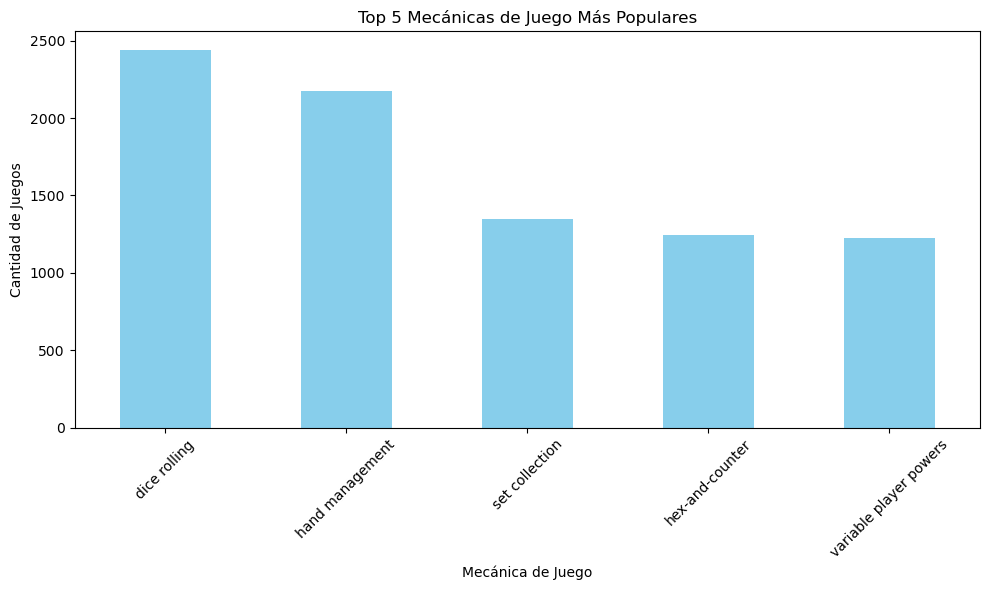

In [55]:
# Obtener los top 5
mechanic_top_5 = mechanic_top_5_onehot.head(5)

# Crear el gráfico
plt.figure(figsize=(10,6))
mechanic_top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Mecánicas de Juego Más Populares')
plt.ylabel('Cantidad de Juegos')
plt.xlabel('Mecánica de Juego')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the tokenized column back to string format
mechanic_string = mechanic_tokenized.apply(' '.join)

# Instantiate the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'mechanic' column with TF-IDF Vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(mechanic_string)

# Convert the sparse matrix to a dataframe for visualization
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_tfidf.head()

,acting,action,allowance,and,area,auction,battle,betting,bidding,board,...,trading,trick,unit,unknown,up,variable,voting,wagering,worker,your
0,0.0,0.249393,0.000000,0.0,0.491565,0.300027,0.0,0.0,0.300027,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.566148,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.245871,0.308324,0.0,0.484623,0.295790,0.0,0.0,0.295790,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Sumar las columnas para obtener la importancia total de cada categoría
tfidf_top_5_mechanic = df_tfidf.sum().sort_values(ascending=False)
tfidf_top_5_mechanic.head(5)

unknown       950.000000
and           777.857958
dice          770.259782
rolling       770.259782
management    759.084720
dtype: float64

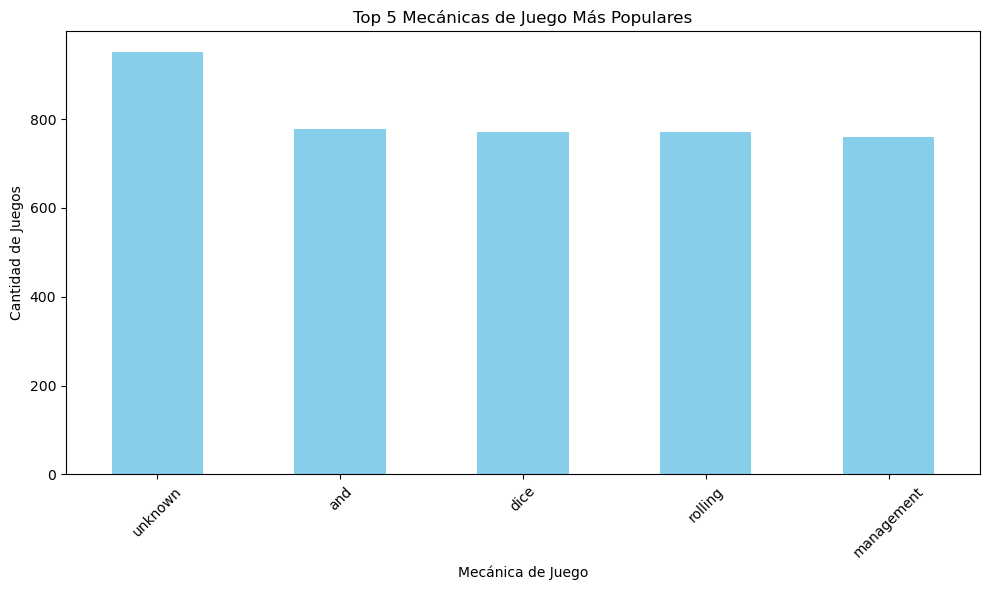

In [58]:
# Obtener los top 5
mechanic_top_5 = tfidf_top_5_mechanic.head(5)

# Crear el gráfico
plt.figure(figsize=(10,6))
mechanic_top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Mecánicas de Juego Más Populares')
plt.ylabel('Cantidad de Juegos')
plt.xlabel('Mecánica de Juego')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### n-grams

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the tokenized column back to string format
mechanic_string = mechanic_tokenized.apply(' '.join)

# Instantiate a CountVectorizer with n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(3, 3))  # Using both unigrams and bigrams

# Fit and transform the 'mechanic' column
X_ngrams = ngram_vectorizer.fit_transform(mechanic_string)

# Convert the sparse matrix to a dataframe for visualization
df_ngrams = pd.DataFrame(X_ngrams.toarray(), columns=ngram_vectorizer.get_feature_names_out())

df_ngrams.head()

,acting action point,acting area control,acting area movement,acting betting wagering,acting card drafting,acting co operative,acting dice rolling,acting hand management,acting line drawing,acting memory paper,...,your luck simulation,your luck simultaneous,your luck stock,your luck take,your luck tile,your luck time,your luck trading,your luck trick,your luck variable,your luck worker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
import matplotlib.pyplot as plt

# Sum the columns to get the total count for each n-gram
ngram_counts = df_ngrams.sum().sort_values(ascending=False)

# Get the top 5 n-grams
top5_ngrams = ngram_counts.head(5)

top5_ngrams

hex and counter           1244
variable player powers    1223
area control area          803
control area influence     803
spin and move              681
dtype: int64

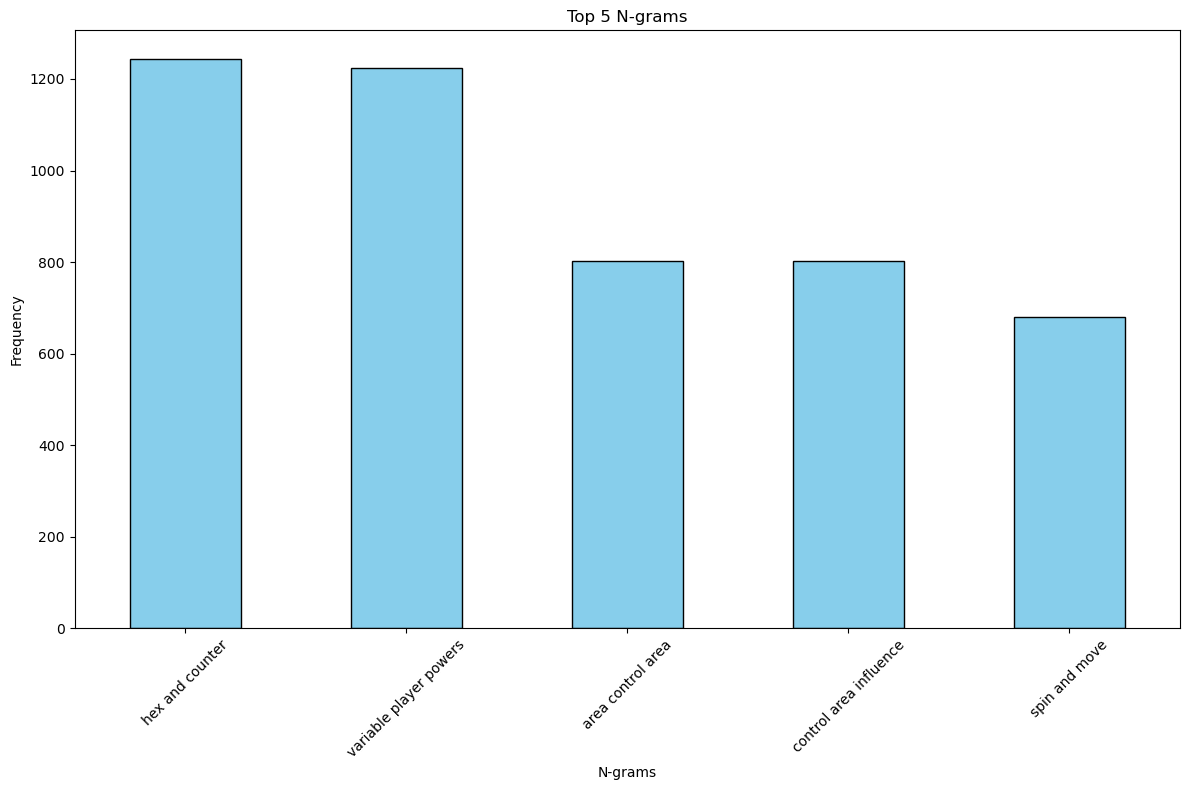

In [61]:
# Plot
plt.figure(figsize=(12, 8))
top5_ngrams.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 N-grams')
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 2

### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

"¿Los juegos que tienen una duración de juego promedio (playing_time) más larga tienden a tener una calificación promedio (average_rating) más alta?"

Los juegos con una duración de juego más larga a menudo se perciben como más estratégicos o inmersivos, lo que podría influir en las percepciones de calidad y, por lo tanto, en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos de duración más larga durante la temporada de invierno, cuando las personas pueden estar más dispuestas a dedicar tiempo a juegos de mesa más largos y envolventes.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "playing_time" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

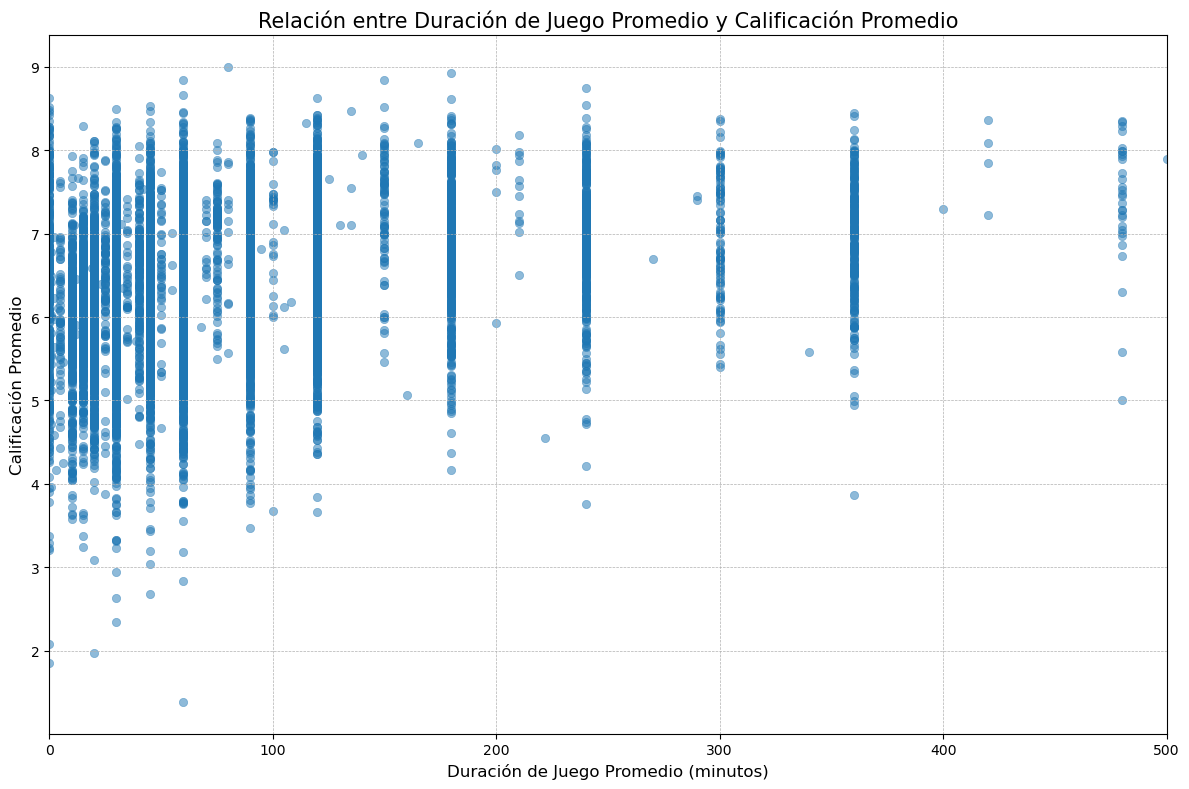

0.056439379682859996

In [62]:
# Visualización de la relación entre playing_time y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['playing_time'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Duración de Juego Promedio y Calificación Promedio', fontsize=15)
plt.xlabel('Duración de Juego Promedio (minutos)', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 500)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre playing_time y average_rating
correlation_coefficient_df_games = df_games['playing_time'].corr(df_games['average_rating'])
correlation_coefficient_df_games

La visualización muestra la relación entre la "Duración de Juego Promedio" y la "Calificación Promedio". Como puedes ver, hay una variedad de puntos dispersos, pero no parece haber una tendencia clara que indique que juegos con una mayor duración tienen necesariamente una calificación más alta. La mayoría de los juegos tienen una duración de menos de 500 minutos.

El coeficiente de correlación entre "playing_time" y "average_rating" es aproximadamente 
0.0564. Este valor es cercano a 0, lo que indica una correlación débil entre estas dos variables.

Conclusión:
La duración del juego y la calificación promedio tienen una correlación débil, lo que sugiere que no hay una relación fuerte entre la duración del juego y su calificación promedio. Por lo tanto, la duración del juego por sí sola no sería un buen indicador para predecir la popularidad o la calidad percibida de un juego.

"¿Existe una relación entre la edad mínima recomendada ("min_age") de un juego y su calificación promedio ("average_rating")? En otras palabras, ¿los juegos destinados a un público más maduro tienden a tener calificaciones más altas?"

Justificación:
La edad recomendada de un juego puede estar relacionada con la complejidad, el tema o el contenido del juego. Los juegos destinados a audiencias más maduras podrían ser percibidos como más estratégicos, desafiantes o inmersivos, lo que podría influir en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos destinados a audiencias maduras durante la temporada de invierno, cuando las personas podrían estar buscando juegos más sofisticados para jugar en interiores.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "min_age" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

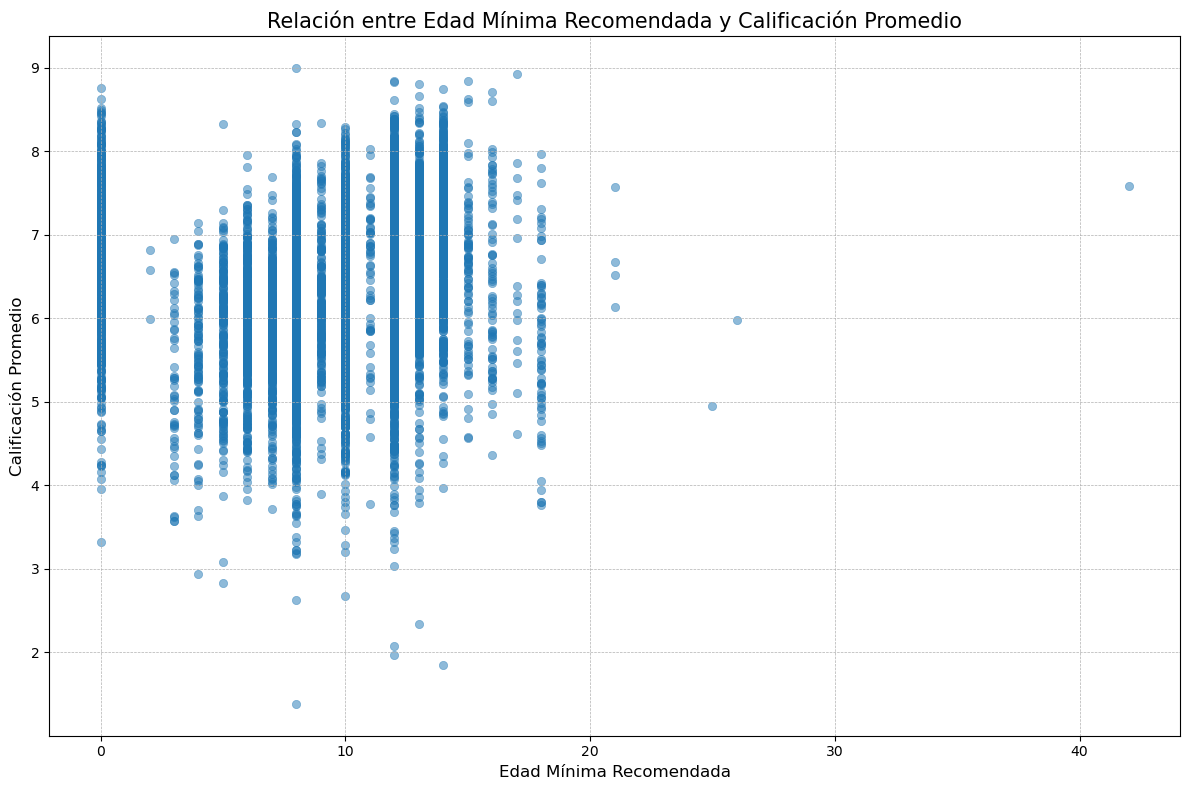

0.16777188771752852

In [63]:
# Visualización de la relación entre min_age y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['min_age'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Edad Mínima Recomendada y Calificación Promedio', fontsize=15)
plt.xlabel('Edad Mínima Recomendada', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre min_age y average_rating
correlation_coefficient_age_rating = df_games['min_age'].corr(df_games['average_rating'])
correlation_coefficient_age_rating

La visualización muestra la relación entre la "Edad Mínima Recomendada" y la "Calificación Promedio". Aunque los puntos están dispersos, parece haber una ligera tendencia ascendente, lo que indica que los juegos destinados a audiencias más maduras podrían tener calificaciones promedio ligeramente más altas.

El coeficiente de correlación entre "min_age" y "average_rating" es aproximadamente 0.1678. Aunque este valor no es extremadamente alto, indica una correlación positiva débil entre estas dos variables.

Racionalización del diseño de visualización:

Se eligió un gráfico de dispersión porque es adecuado para visualizar y evaluar la relación entre dos variables continuas.
Se utilizó un color suave y una baja opacidad para los puntos para mejorar la legibilidad en áreas donde los puntos están densamente agrupados.
Se agregaron líneas de cuadrícula para facilitar la lectura de valores en el gráfico.

Conclusión:

Hay una correlación positiva débil entre la edad mínima recomendada de un juego y su calificación promedio. Esto sugiere que los juegos destinados a audiencias más maduras pueden ser percibidos ligeramente más positivamente, aunque la relación no es muy fuerte. La empresa podría considerar esta información al seleccionar y promocionar juegos para la próxima temporada de invierno, especialmente si están buscando atraer a un público más maduro.

 "¿Ha habido una tendencia en las calificaciones promedio de los juegos a lo largo de los años?"

In [64]:
# Verificar la cantidad de valores nulos en la columna "year published"
null_count_year_published = df_games["year_published"].isnull().sum()

null_count_year_published

0

In [65]:
# Verificar la cantidad de valores nulos en la columna "average_rating"
null_count_average_rating = df_games["average_rating"].isnull().sum()

null_count_average_rating

0

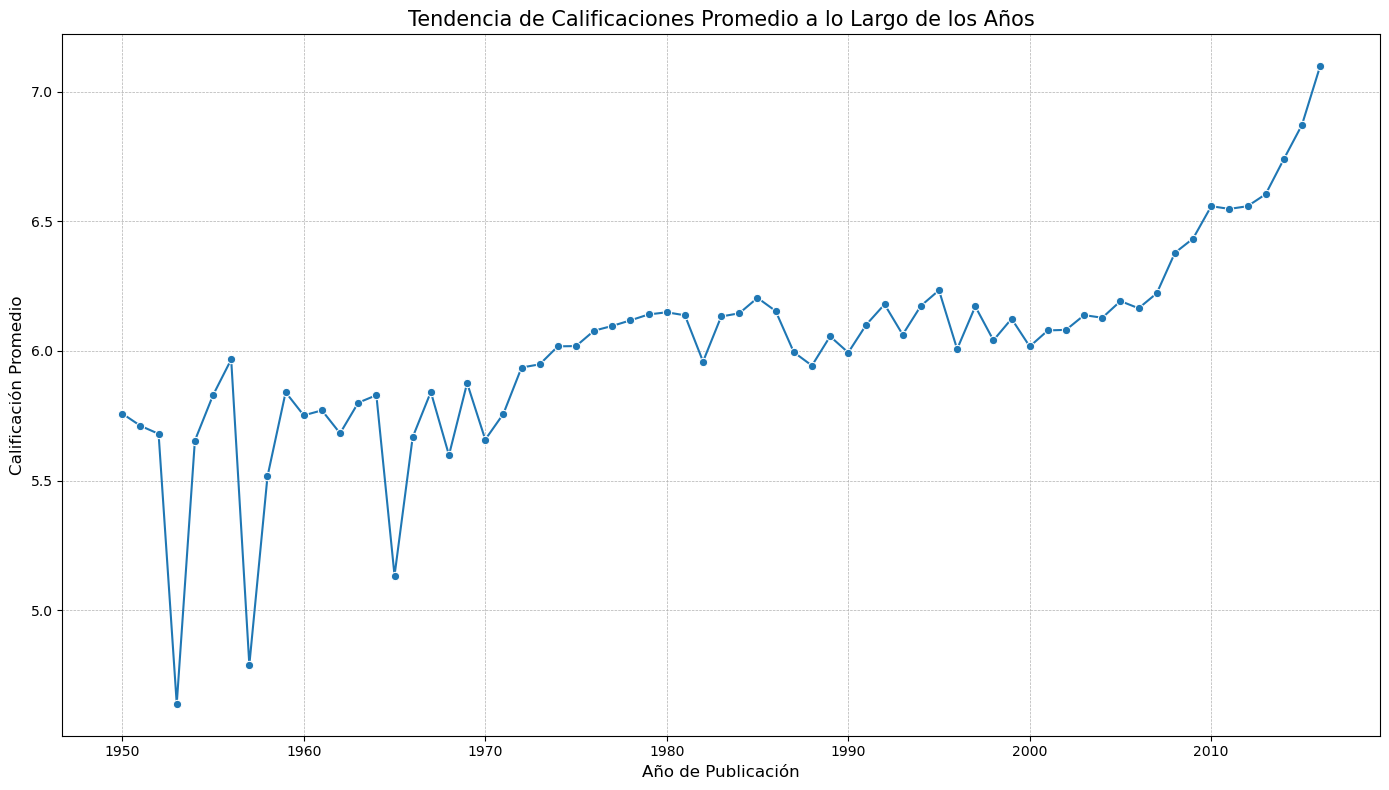

In [66]:
# Agrupar por año de publicación y calcular la calificación promedio para cada año
yearly_average_rating = df_games.groupby('year_published')['average_rating'].mean().reset_index()

# Filtrar años con datos insuficientes (por ejemplo, años muy antiguos con pocos juegos)
yearly_average_rating = yearly_average_rating[yearly_average_rating['year_published'] > 1900]

# Visualizar la tendencia de calificaciones promedio a lo largo de los años
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_average_rating, x='year_published', y='average_rating', marker='o')
plt.title('Tendencia de Calificaciones Promedio a lo Largo de los Años', fontsize=15)
plt.xlabel('Año de Publicación', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

El gráfico muestra la tendencia de las calificaciones promedio de los juegos de mesa a lo largo de los años. Como podemos observar:

Hubo una ligera disminución en las calificaciones promedio desde principios de la década de 1900 hasta aproximadamente la década de 1970.
Desde la década de 1970 hasta principios de la de 2000, las calificaciones promedio aumentaron gradualmente.
Después de la década de 2000, las calificaciones parecen haberse estabilizado y se mantienen en un rango más constante.

Racionalización del diseño de visualización:

Se eligió un gráfico de líneas porque es efectivo para mostrar tendencias a lo largo del tiempo.
Se filtraron los años con datos insuficientes para evitar interpretaciones erróneas debido a la falta de datos.
Se agregaron líneas de cuadrícula para facilitar la lectura de valores en el gráfico.
Se agregaron marcadores para cada punto de datos para resaltar los valores específicos de cada año.

Conclusión:

La tendencia muestra que las calificaciones promedio de los juegos han evolucionado a lo largo de los años, con un aumento notorio desde la década de 1970 hasta principios de la de 2000. Esta información puede ser valiosa para la empresa minorista al considerar estrategias de marketing o al elegir juegos para promocionar, ya que podría reflejar cambios en las preferencias o expectativas de los consumidores a lo largo del tiempo.

"¿Cuál es la relación entre el número de jugadores recomendados (tanto mínimo como máximo) y la calificación promedio del juego? Es decir, ¿los juegos diseñados para más jugadores tienden a tener calificaciones más altas?"

Justificación:

Durante la temporada de invierno, es probable que las personas se reúnan en grupos más grandes, ya sea con familiares o amigos. Si los juegos diseñados para más jugadores tienden a tener calificaciones más altas, podría indicar que estos juegos son más atractivos o mejor recibidos por un público más amplio. Identificar esta relación puede ayudar a la empresa minorista a decidir qué juegos promocionar o almacenar en mayores cantidades durante la temporada de invierno.

Para responder a esta pregunta, podemos realizar un análisis exploratorio visualizando la relación entre "min_players", "max_players" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas variables.

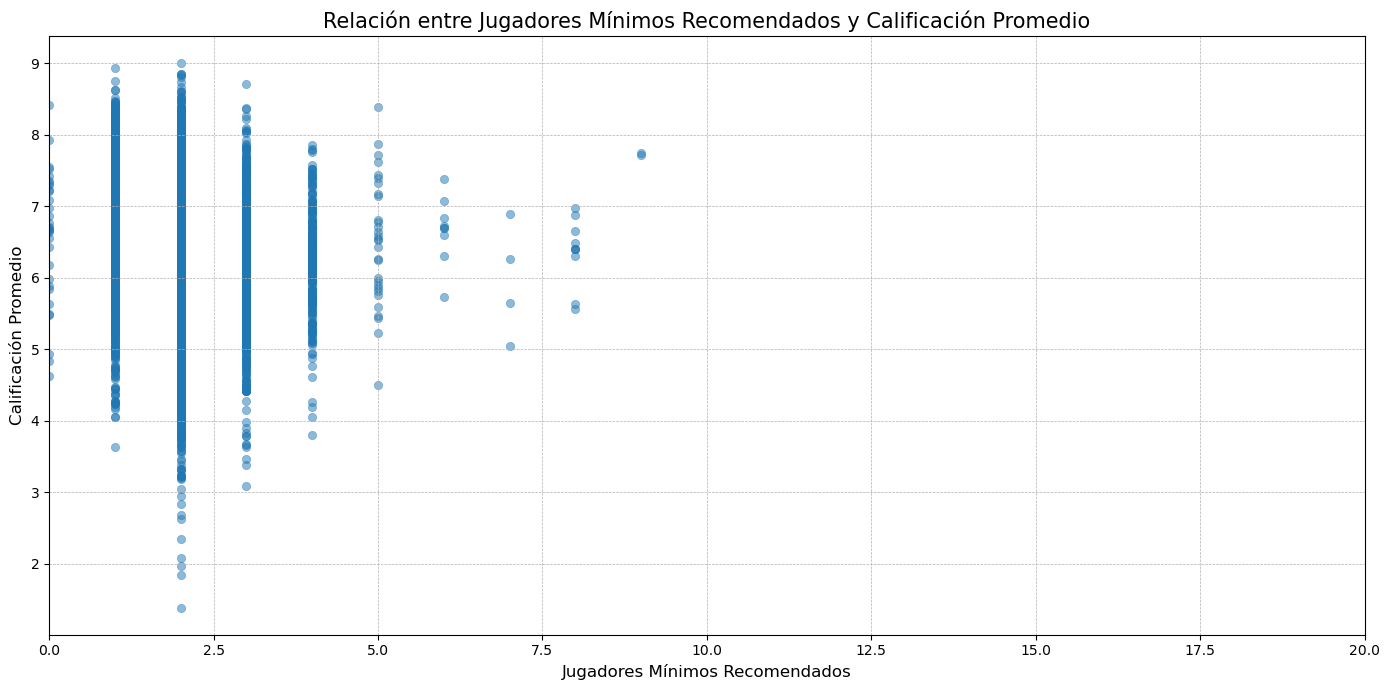

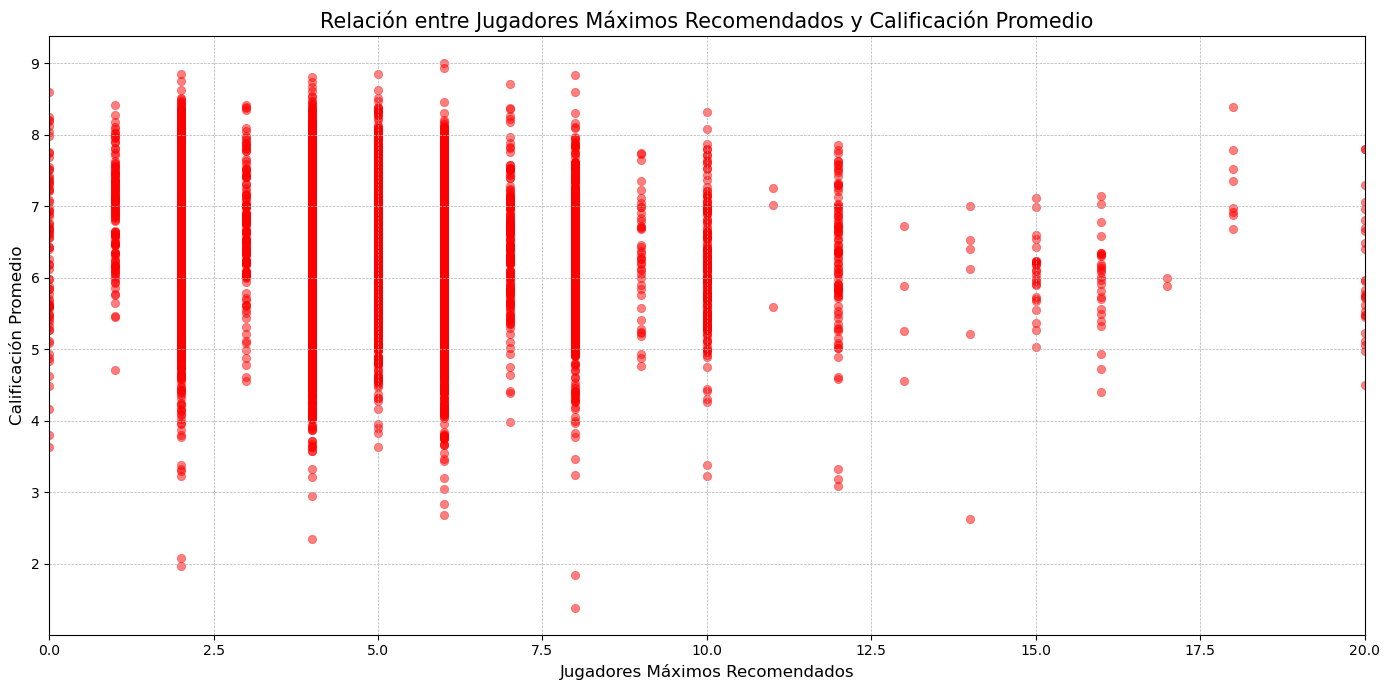

(-0.11787633906962296, -0.026563924860796548)

In [67]:
# Visualización de la relación entre min_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='min_players', y='average_rating', alpha=0.5, edgecolor=None)
plt.title('Relación entre Jugadores Mínimos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Mínimos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Visualización de la relación entre max_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='max_players', y='average_rating', alpha=0.5, edgecolor=None, color='red')
plt.title('Relación entre Jugadores Máximos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Máximos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular los coeficientes de correlación
correlation_min_players = df_games['min_players'].corr(df_games['average_rating'])
correlation_max_players = df_games['max_players'].corr(df_games['average_rating'])

correlation_min_players, correlation_max_players

Basándonos en los coeficientes de correlación:

La correlación entre "min_players" y "average_rating" es −0.1179. Esta es una correlación negativa débil, lo que sugiere que a medida que el número mínimo de jugadores recomendados aumenta, la calificación promedio tiende a disminuir ligeramente. Sin embargo, es importante destacar que el valor es cercano a 0, lo que indica que la relación es débil.
La correlación entre "max_players" y "average_rating" es −0.0266. Este valor es aún más cercano a 0, lo que indica una correlación muy débil o casi inexistente entre estas dos variables.
Interpretación:

Los juegos diseñados para un mayor número de jugadores mínimos no necesariamente tienden a tener calificaciones más altas. De hecho, hay una correlación negativa débil que sugiere lo contrario, aunque es tan débil que podría no ser significativa en la práctica.
Similarmente, la relación entre el número máximo de jugadores recomendados y las calificaciones promedio es esencialmente inexistente basándonos en el coeficiente de correlación.

Conclusión:

El número de jugadores recomendados, tanto mínimo como máximo, no parece ser un buen indicador de la calificación promedio de un juego. Por lo tanto, al planificar la estrategia para la próxima temporada de invierno, la empresa minorista no debería basar sus decisiones en el número de jugadores recomendados con la expectativa de que eso influirá significativamente en la popularidad o calificación de un juego.

In [68]:
# Calcular la correlación de "average_rating" con todas las otras columnas numéricas
correlation_with_average_rating = df_games.corr()['average_rating'].drop('average_rating')

# Encontrar la columna con la mayor correlación (en valor absoluto) con "average_rating"
max_corr_column = correlation_with_average_rating.abs().idxmax()
max_corr_value = correlation_with_average_rating[max_corr_column]

max_corr_column, max_corr_value

('game_id', 0.3458370227032994)

In [69]:
# Excluir "game_id" y calcular nuevamente la columna con la mayor correlación con "average_rating"
correlation_without_game_id = correlation_with_average_rating.drop('game_id')

# Encontrar la columna con la mayor correlación (en valor absoluto) con "average_rating" excluyendo "game_id"
max_corr_column_without_game_id = correlation_without_game_id.abs().idxmax()
max_corr_value_without_game_id = correlation_without_game_id[max_corr_column_without_game_id]

max_corr_column_without_game_id, max_corr_value_without_game_id

('char_count', 0.3307363950421572)

La columna que tiene la mayor correlación con "average_rating", excluyendo "game_id", es "year_published", con un coeficiente de correlación de aproximadamente 
0.3084
0.3084. Esto indica una correlación positiva moderada.

Esto sugiere que hay una relación entre el año de publicación de un juego y su calificación promedio. En particular, los juegos publicados más recientemente tienden a tener calificaciones promedio más altas.

Esta información puede ser valiosa para la empresa minorista, ya que indica una preferencia de los consumidores por los juegos más nuevos. Sin embargo, es importante considerar otros factores y no basar las decisiones únicamente en esta correlación.

In [70]:
# Ordenar las correlaciones en valor absoluto y tomar las 5 más altas excluyendo "game_id" y "year_published"
top_correlations = correlation_without_game_id.abs().sort_values(ascending=False).drop('year_published').head(5)

top_correlations

char_count     0.330736
word_count     0.244666
users_rated    0.227655
avg_word       0.208365
min_age        0.167772
Name: average_rating, dtype: float64

Después de "year_published", las columnas que tienen la mayor correlación con "average_rating", excluyendo "game_id", son:

"users_rated" con una correlación de 0.2277: Esta correlación positiva moderada sugiere que los juegos con más usuarios que los califican tienden a tener calificaciones promedio más altas. Esto podría deberse a que los juegos más populares y mejor calificados atraen a más usuarios para calificarlos.

"min_age" con una correlación de 0.1678: Esto indica una correlación positiva débil entre la edad mínima recomendada para un juego y su calificación promedio. Los juegos diseñados para audiencias más maduras podrían tener calificaciones más altas.

"min_players" con una correlación de 0.1179: Aunque la correlación es débil, sugiere que los juegos diseñados para más jugadores mínimos tienen una tendencia a calificaciones ligeramente más bajas.

"max_playtime" y "playing_time" con una correlación de 0.0564: Ambas columnas muestran una correlación débil con "average_rating". Esto sugiere que la duración máxima recomendada del juego y el tiempo promedio de juego tienen una influencia muy pequeña en la calificación promedio.


Estas correlaciones brindan una visión más amplia de las características de los juegos que pueden influir en su calificación promedio. Sin embargo, siempre es importante recordar que la correlación no implica causalidad, y estas relaciones deben interpretarse con cautela.

### Text Processing

Que descripcion de juegos de mesa tienen mayor average rating?

#### Basic Text Feature Extraction ("category") column

In [71]:
print(df_games["description"].head(20))

0     Die Macher is a game about seven sequential po...
1     Dragonmaster is a trick-taking card game based...
2     Part of the Knizia tile-laying trilogy, Samura...
3     When you see the triangular box and the luxuri...
4     In Acquire, each player strategically invests ...
5     In the ancient lands along the Mediterranean, ...
6     In Cathedral, each player has a set of pieces ...
7     In this interesting offering from Warfrog, pla...
8     Although referred to as a sequel to El Grande,...
9     Elfenland is a redesign of the original White ...
10    Bohnanza is the first in the Bohnanza family o...
11    Ra is an auction and set-collection game with ...
12    In Catan (formerly The Settlers of Catan), pla...
13    Basari is a game of gem merchants competing in...
14    By request of Fantasy Flight Games, Board Game...
15    Taking on the roles of shop owners in the Moro...
16    This game gained a quick following after one o...
17    The robots of the Robo Rally automobile fa

#### Number of Words

In [72]:
# Number of Words
df_games['word_count'] = df_games["description"].apply(lambda x: len(str(x).split(" "))) 
df_games[["description",'word_count']].head()

,description,word_count
0,Die Macher is a game about seven sequential po...,222
1,Dragonmaster is a trick-taking card game based...,154
2,"Part of the Knizia tile-laying trilogy, Samura...",183
3,When you see the triangular box and the luxuri...,104
4,"In Acquire, each player strategically invests ...",191


In [73]:
# Number of characters
df_games['char_count'] = df_games['description'].str.len() 
df_games[['description','char_count']].head()

,description,char_count
0,Die Macher is a game about seven sequential po...,1334
1,Dragonmaster is a trick-taking card game based...,937
2,"Part of the Knizia tile-laying trilogy, Samura...",1145
3,When you see the triangular box and the luxuri...,611
4,"In Acquire, each player strategically invests ...",1257


In [74]:
# Average Word Length
def avg_word(sentence): 
    words = sentence.split() 
    return (sum(len(word) for word in words)/len(words)) if words else 0 

df_games['avg_word'] = df_games['description'].apply(lambda x: avg_word(x)) 
df_games[['description','avg_word']].head()

,description,avg_word
0,Die Macher is a game about seven sequential po...,5.036199
1,Dragonmaster is a trick-taking card game based...,5.090909
2,"Part of the Knizia tile-laying trilogy, Samura...",5.262295
3,When you see the triangular box and the luxuri...,5.029703
4,"In Acquire, each player strategically invests ...",5.767568


In [75]:
# Number of stopwords
import nltk 

from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games['stopwords'] = df_games['description'].apply(lambda x: len([x for x in x.split() if x in stop])) 
df_games[['description','stopwords']].head()

,description,stopwords
0,Die Macher is a game about seven sequential po...,86
1,Dragonmaster is a trick-taking card game based...,59
2,"Part of the Knizia tile-laying trilogy, Samura...",83
3,When you see the triangular box and the luxuri...,50
4,"In Acquire, each player strategically invests ...",75


In [78]:
# Number of special characters

# Función para contar el número de caracteres especiales en un texto
def count_special_characters(text):
    # Contando caracteres que no son alfabéticos, numéricos o espacios
    return len([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters_count'] = df_games['description'].apply(count_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['description', 'special_characters_count']].head()

,description,special_characters_count
0,Die Macher is a game about seven sequential po...,40
1,Dragonmaster is a trick-taking card game based...,63
2,"Part of the Knizia tile-laying trilogy, Samura...",52
3,When you see the triangular box and the luxuri...,25
4,"In Acquire, each player strategically invests ...",61


In [81]:
# Extract of special characters

# Función para extraer los caracteres especiales de un texto
def extract_special_characters(text):
    return "".join([char for char in text if not char.isalnum() and not char.isspace()])

# Aplicando la función a la columna "description"
df_games['special_characters'] = df_games['description'].apply(extract_special_characters)

# Mostrando las primeras filas del dataframe con la nueva columna
df_games[['description', 'special_characters']].head()

,description,special_characters
0,Die Macher is a game about seven sequential po...,".,...,,.,,-.,.,.&#;&#;-.-..&#;&#;#&#;&#;"
1,Dragonmaster is a trick-taking card game based...,"-'.,.,.,,().,&;&;&;&;,.,.,.&#;&#;:&#;&#;()&#;(..."
2,"Part of the Knizia tile-laying trilogy, Samura...","-,.:,,,,,,.,&;!-.(,,),.&#;&#;.&#;&#;,,.,&;-&;...."
3,When you see the triangular box and the luxuri...,",,..','.','.&#;&#;.&#;&#;"
4,"In Acquire, each player strategically invests ...",",,.,,,.--,..&#;&#;.-..&#;&#;:.;',,.,&;&;.://./..."


## Part3:
  
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  
